# Árvores de decisão - parte II: primeiro modelo de árvore de decisão

#### 1) Carregue a base e garanta que a base está como deveria.

Lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('df_skl.csv')
dados.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_fone_comercial,possui_fone,possui_email,mau,...,tipo_residencia_Rented apartment,tipo_residencia_With parents,qt_pessoas_residencia_2,qt_pessoas_residencia_3,qt_pessoas_residencia_4,qt_pessoas_residencia_5,qt_pessoas_residencia_6,qt_pessoas_residencia_7,qt_pessoas_residencia_9,qt_pessoas_residencia_15
0,0,1,1,0,58,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,52,8,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,52,8,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,46,2,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,29,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

y = dados.mau
X = dados.drop('mau', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state = 123)
ad = clf.fit(X_train, y_train)

[Text(0.6163972823068378, 0.9782608695652174, 'tempo_emprego <= 4.5\ngini = 0.047\nsamples = 11655\nvalue = [11373, 282]\nclass = Aprovados'),
 Text(0.3443787027894347, 0.9347826086956522, 'posse_de_imovel <= 0.5\ngini = 0.06\nsamples = 6103\nvalue = [5914, 189]\nclass = Aprovados'),
 Text(0.23539133855838065, 0.8913043478260869, 'educacao_Incomplete higher <= 0.5\ngini = 0.08\nsamples = 1862\nvalue = [1784, 78]\nclass = Aprovados'),
 Text(0.20911889039743273, 0.8478260869565217, 'tipo_residencia_Municipal apartment <= 0.5\ngini = 0.075\nsamples = 1777\nvalue = [1708, 69]\nclass = Aprovados'),
 Text(0.18520889903727475, 0.8043478260869565, 'tipo_residencia_Office apartment <= 0.5\ngini = 0.068\nsamples = 1662\nvalue = [1603, 59]\nclass = Aprovados'),
 Text(0.16108676869908664, 0.7608695652173914, 'estado_civil_Widow <= 0.5\ngini = 0.066\nsamples = 1641\nvalue = [1585, 56]\nclass = Aprovados'),
 Text(0.12469143421377438, 0.717391304347826, 'qt_pessoas_residencia_3 <= 0.5\ngini = 0.062\n

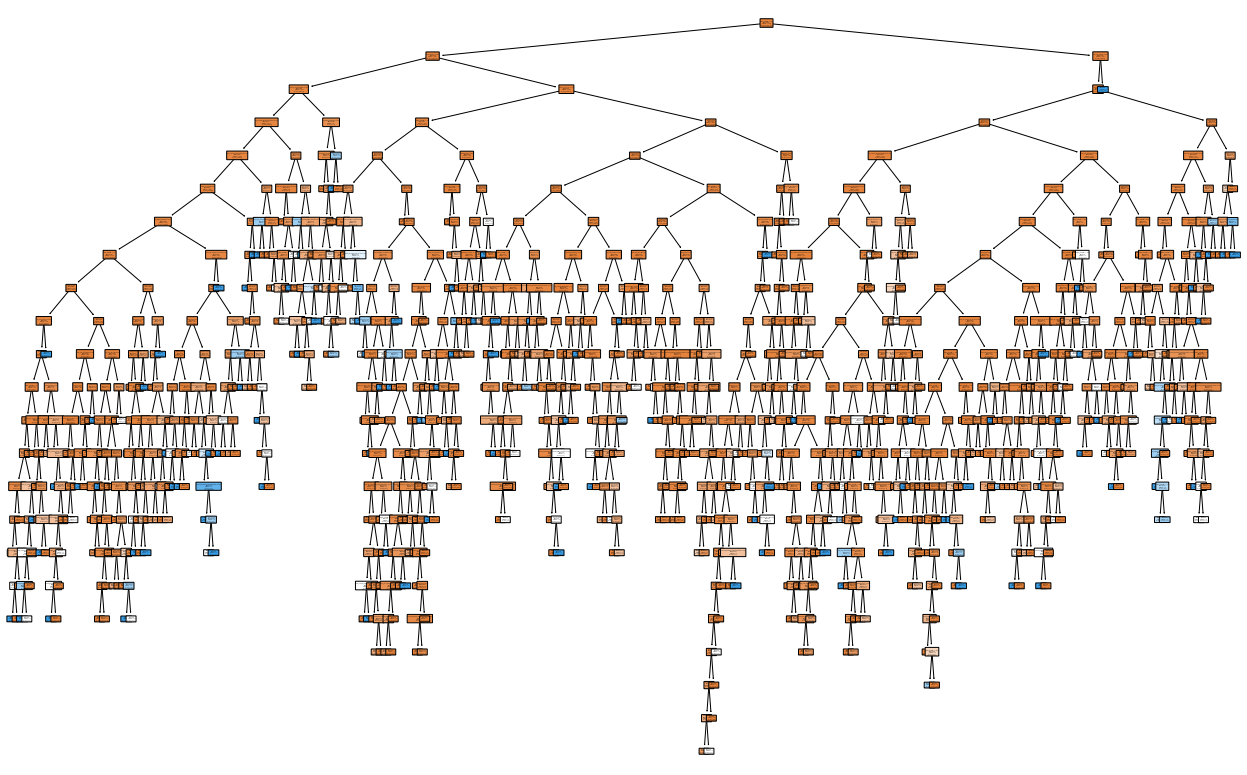

In [57]:
plt.figure(figsize = [22,14])
plot_tree(ad, filled = True, rounded = True, class_names=['Aprovados', 'Reprovados'], feature_names = X_train.columns)

C:\Users\Artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


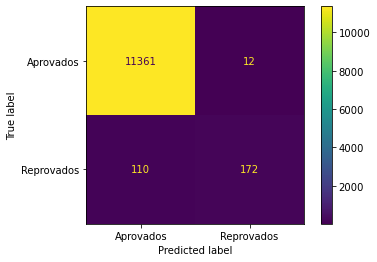

In [39]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

plot_confusion_matrix(ad, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [55]:
acuracia_treino = ((11361+172)/11655)*100
print(f'Acurácia do treino = {acuracia_treino}%')

Acurácia do treino = 98.95323895323895%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [51]:
y_predito = ad.predict(X_test)

C:\Users\Artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


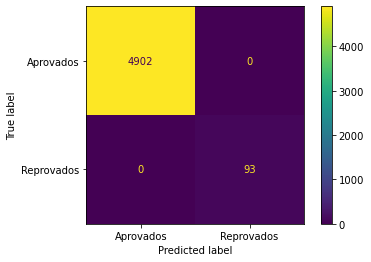

In [52]:
plot_confusion_matrix(ad, X_test, y_predito, display_labels=['Aprovados', 'Reprovados'])

In [56]:
acuracia_teste = accuracy_score(y_test, y_predito)*100
print(f'Acurácia do teste = {acuracia_teste}%')

Acurácia do teste = 96.85685685685685%


In [59]:
clf_podada = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 123)
ad_podada = clf_podada.fit(X_train, y_train)
y_predito_padado = ad.predict(X_test)

[Text(0.5509192800353356, 0.9545454545454546, 'tempo_emprego <= 4.5\ngini = 0.047\nsamples = 11655\nvalue = [11373, 282]\nclass = Aprovados'),
 Text(0.2582541961130742, 0.8636363636363636, 'posse_de_imovel <= 0.5\ngini = 0.06\nsamples = 6103\nvalue = [5914, 189]\nclass = Aprovados'),
 Text(0.14581492932862192, 0.7727272727272727, 'educacao_Incomplete higher <= 0.5\ngini = 0.08\nsamples = 1862\nvalue = [1784, 78]\nclass = Aprovados'),
 Text(0.12201855123674912, 0.6818181818181818, 'tipo_residencia_Municipal apartment <= 0.5\ngini = 0.075\nsamples = 1777\nvalue = [1708, 69]\nclass = Aprovados'),
 Text(0.09916077738515901, 0.5909090909090909, 'tipo_residencia_Office apartment <= 0.5\ngini = 0.068\nsamples = 1662\nvalue = [1603, 59]\nclass = Aprovados'),
 Text(0.07818021201413428, 0.5, 'estado_civil_Widow <= 0.5\ngini = 0.066\nsamples = 1641\nvalue = [1585, 56]\nclass = Aprovados'),
 Text(0.053886925795053005, 0.4090909090909091, 'qt_pessoas_residencia_3 <= 0.5\ngini = 0.062\nsamples = 156

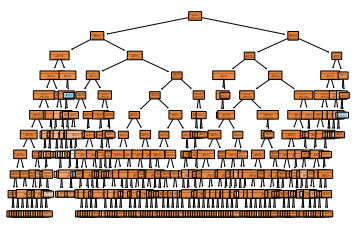

In [60]:
plot_tree(clf_podada, filled = True, rounded = True, class_names=['Aprovados', 'Reprovados'], feature_names = X_train.columns)

C:\Users\Artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


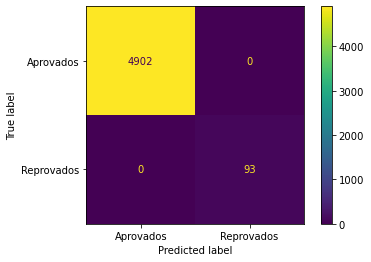

In [61]:
plot_confusion_matrix(ad, X_test, y_predito_padado, display_labels=['Aprovados', 'Reprovados'])

In [64]:
y_deuns = np.ones(len(y_test))
acuracia_teste_uns = accuracy_score(y_test, y_deuns)*100
print(f'Acurácia do teste = {acuracia_teste_uns}%')

Acurácia do teste = 2.1621621621621623%


In [65]:
y_dezeros = np.zeros(len(y_test))
acuracia_teste_zeros = accuracy_score(y_test, y_dezeros)*100
print(f'Acurácia do teste = {acuracia_teste_zeros}%')

Acurácia do teste = 97.83783783783784%


Acurácia do nosso modelo está equivalente a considerar todos como '0', temos de melhorar o modelo